In [1]:
# Statsmodels time series analysis

In [2]:
# Statsmodels, Dates and datetime

In [3]:
import statsmodels.api as sm

In [4]:
sm.tsa.datetools.dates_from_range('2010', length=12)

[datetime.datetime(2010, 12, 31, 0, 0),
 datetime.datetime(2011, 12, 31, 0, 0),
 datetime.datetime(2012, 12, 31, 0, 0),
 datetime.datetime(2013, 12, 31, 0, 0),
 datetime.datetime(2014, 12, 31, 0, 0),
 datetime.datetime(2015, 12, 31, 0, 0),
 datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2017, 12, 31, 0, 0),
 datetime.datetime(2018, 12, 31, 0, 0),
 datetime.datetime(2019, 12, 31, 0, 0),
 datetime.datetime(2020, 12, 31, 0, 0),
 datetime.datetime(2021, 12, 31, 0, 0)]

In [5]:
sm.tsa.datetools.dates_from_range('2010m1', length=120)

[datetime.datetime(2010, 1, 31, 0, 0),
 datetime.datetime(2010, 2, 28, 0, 0),
 datetime.datetime(2010, 3, 31, 0, 0),
 datetime.datetime(2010, 4, 30, 0, 0),
 datetime.datetime(2010, 5, 31, 0, 0),
 datetime.datetime(2010, 6, 30, 0, 0),
 datetime.datetime(2010, 7, 31, 0, 0),
 datetime.datetime(2010, 8, 31, 0, 0),
 datetime.datetime(2010, 9, 30, 0, 0),
 datetime.datetime(2010, 10, 31, 0, 0),
 datetime.datetime(2010, 11, 30, 0, 0),
 datetime.datetime(2010, 12, 31, 0, 0),
 datetime.datetime(2011, 1, 31, 0, 0),
 datetime.datetime(2011, 2, 28, 0, 0),
 datetime.datetime(2011, 3, 31, 0, 0),
 datetime.datetime(2011, 4, 30, 0, 0),
 datetime.datetime(2011, 5, 31, 0, 0),
 datetime.datetime(2011, 6, 30, 0, 0),
 datetime.datetime(2011, 7, 31, 0, 0),
 datetime.datetime(2011, 8, 31, 0, 0),
 datetime.datetime(2011, 9, 30, 0, 0),
 datetime.datetime(2011, 10, 31, 0, 0),
 datetime.datetime(2011, 11, 30, 0, 0),
 datetime.datetime(2011, 12, 31, 0, 0),
 datetime.datetime(2012, 1, 31, 0, 0),
 datetime.datetime(

In [6]:
# Q-Q plots

In [7]:
from statsmodels.graphics.api import qqplot
import numpy as np

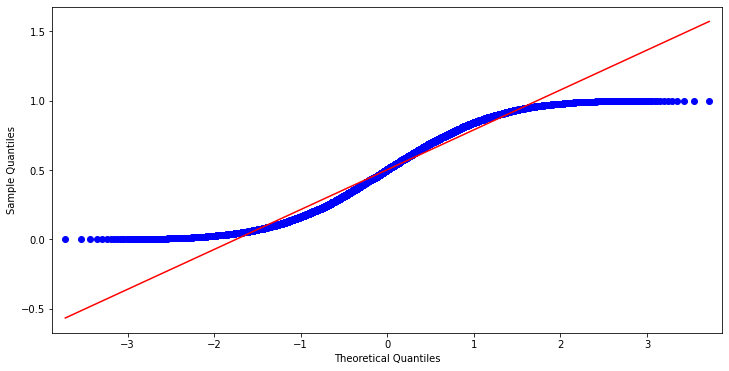

In [8]:
fig = qqplot(np.random.uniform(size=10000), line='s')
fig.set_size_inches(12, 6)

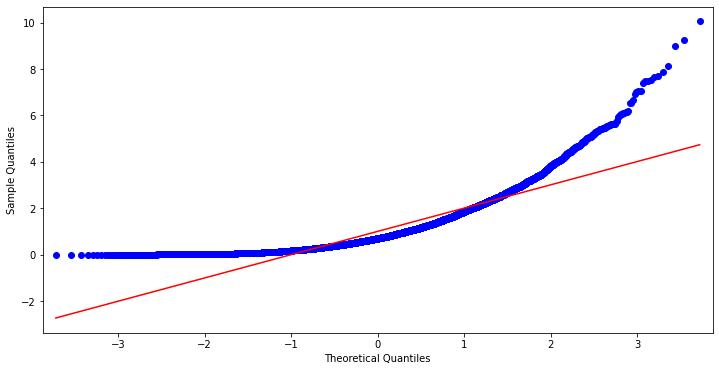

In [9]:
fig = qqplot(np.random.exponential(size=10000), line='s')
fig.set_size_inches(12, 6)

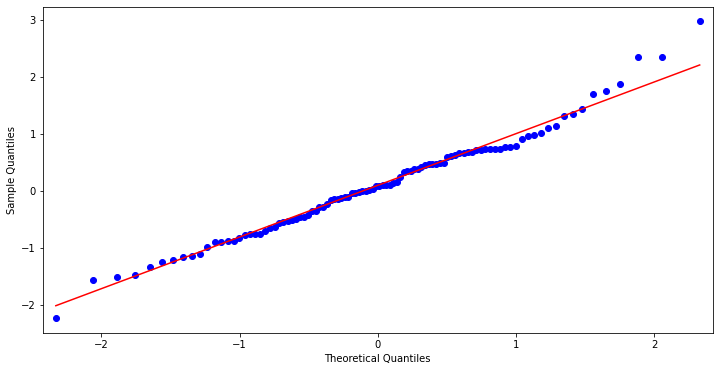

In [10]:
fig = qqplot(np.random.normal(size=100), line='s')
fig.set_size_inches(12, 6)

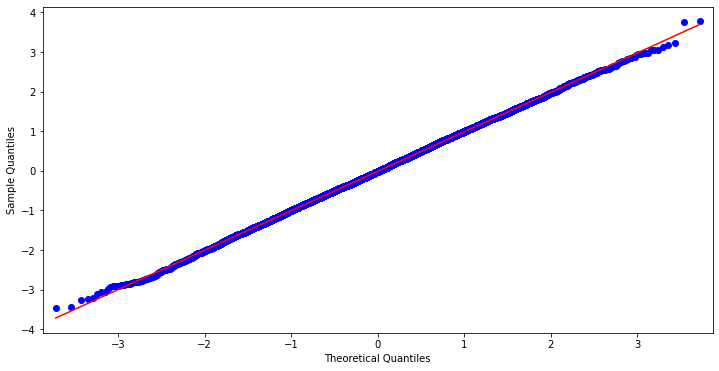

In [11]:
fig = qqplot(np.random.normal(size=10000), line='s')
fig.set_size_inches(12, 6)

In [12]:
# Trends and Cycles

In [13]:
import pandas as pd
n_obs = 12 * 20
linear_trend = np.linspace(100, 200, num=n_obs)
cycle = np.sin(linear_trend) * 10
error_noise = np.random.randn(n_obs)
dataset = pd.DataFrame(linear_trend + cycle + error_noise,
                       index=sm.tsa.datetools.dates_from_range('2000m1', length=n_obs),
                      columns=['Price'])
dataset

,Price
2000-01-31,95.317833
2000-02-29,100.268895
2000-03-31,105.955727
2000-04-30,109.199362
2000-05-31,113.265105
...,...
2019-08-31,193.205975
2019-09-30,192.104184
2019-10-31,188.998042
2019-11-30,188.524009


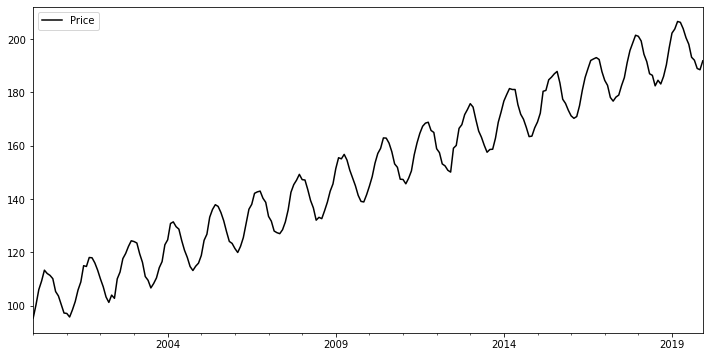

In [14]:
import matplotlib.pyplot as plt
dataset.plot(figsize=(12, 6), color='black')

In [15]:
hp_cycle, hp_trend = sm.tsa.filters.hpfilter(dataset['Price'], lamb=129600)
decomp = dataset[['Price']]
decomp['HP_Cycle'] = hp_cycle
decomp['HP_Trend'] = hp_trend
decomp

,Price,HP_Cycle,HP_Trend
2000-01-31,95.317833,-6.568693,101.886526
2000-02-29,100.268895,-1.974873,102.243768
2000-03-31,105.955727,3.354769,102.600958
2000-04-30,109.199362,6.241329,102.958033
2000-05-31,113.265105,9.950155,103.314950
...,...,...,...
2019-08-31,193.205975,-3.807107,197.013082
2019-09-30,192.104184,-5.268465,197.372649
2019-10-31,188.998042,-8.733807,197.731849
2019-11-30,188.524009,-9.566865,198.090874


In [16]:
uc = sm.tsa.UnobservedComponents(dataset['Price'], level='lltrend', cycle=True, stochastic_cycle=True)
res_uc = uc.fit(method='powell', disp=True)
res_uc.summary()

/home/sghosh/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 1.991240
         Iterations: 6
         Function evaluations: 514


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:                  Price   No. Observations:                  240
Model:             local linear trend   Log Likelihood                -477.898
                   + stochastic cycle   AIC                            965.795
Date:                Sat, 13 Jun 2020   BIC                            983.114
Time:                        09:18:14   HQIC                           972.777
Sample:                    01-31-2000                                         
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.4466      0.192      2.324      0.020       0.070       0.823
sigma2.level      1.304e-17      0.086   1.51e-16      1.000      -0.169       0.169
sigma2.trend      1.512e-19   2.91e-05    5.2e-15      1.000    -5.7e-05     5.7e-05
sigma2.cycle         1.5171      0.502      3.022      0.003       0.533       2.501
frequency.cycle      0.3491      0.013     27.657      0.000       0.324       0.374
===================================================================================
Ljung-Box (Q):                      379.31   Jarque-Bera (JB):                 8.06
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               1.06   Skew:                             0.34
Prob(H) (two-sided):                  0.79   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
decomp['UC_Cycle'] = res_uc.cycle.smoothed
decomp['UC_Trend'] = res_uc.level.smoothed
decomp['UC_Error'] = res_uc.resid
decomp

,Price,HP_Cycle,HP_Trend,UC_Cycle,UC_Trend,UC_Error
2000-01-31,95.317833,-6.568693,101.886526,-4.471826,99.934962,95.317833
2000-02-29,100.268895,-1.974873,102.243768,0.069300,100.353221,7.825267
2000-03-31,105.955727,3.354769,102.600958,4.976988,100.771481,6.212249
2000-04-30,109.199362,6.241329,102.958033,8.283690,101.189740,-4.221861
2000-05-31,113.265105,9.950155,103.314950,11.108972,101.607999,6.046970
...,...,...,...,...,...,...
2019-08-31,193.205975,-3.807107,197.013082,-4.567822,198.225902,-2.173737
2019-09-30,192.104184,-5.268465,197.372649,-6.969134,198.644162,1.279917
2019-10-31,188.998042,-8.733807,197.731849,-9.848672,199.062421,-1.338144
2019-11-30,188.524009,-9.566865,198.090874,-10.563070,199.480680,0.060222


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
s_dc = seasonal_decompose(dataset['Price'], model='additive')
decomp['SDC_Cycle'] = s_dc.seasonal
decomp['SDC_Trend'] = s_dc.trend
decomp['SDC_Error'] = s_dc.resid
decomp[118:122]

,Price,HP_Cycle,HP_Trend,UC_Cycle,UC_Trend,UC_Error,SDC_Cycle,SDC_Trend,SDC_Error
2009-11-30,138.880802,-10.442881,149.323683,-10.196474,149.289562,0.900605,0.086345,147.099394,-8.304938
2009-12-31,141.588790,-8.161743,149.750533,-8.258168,149.707821,2.526741,0.468230,147.787410,-6.666849
2010-01-31,144.806280,-5.371232,150.177512,-5.413588,150.126081,1.636161,0.235842,148.913807,-4.343369
2010-02-28,148.389107,-2.215373,150.604480,-1.996836,150.544340,0.806930,0.367059,150.202629,-2.180581


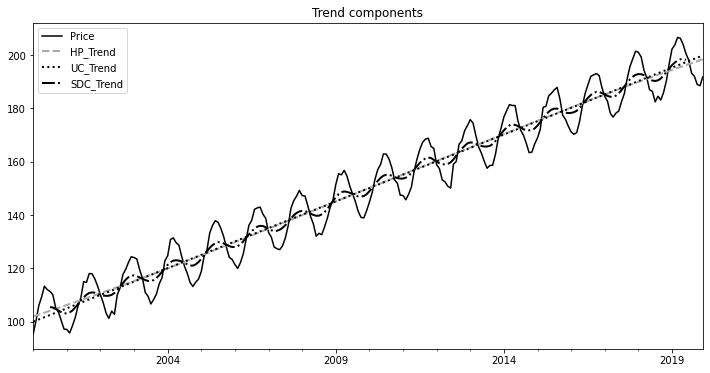

In [19]:
plt.title('Trend components')
decomp['Price'].plot(figsize=(12, 6), color='black', linestyle='-', legend='Price')
decomp['HP_Trend'].plot(figsize=(12, 6), color='darkgray', linestyle='--', lw=2, legend='HP_Trend')
decomp['UC_Trend'].plot(figsize=(12, 6), color='black', linestyle=':', lw=2, legend='UC_Trend')
decomp['SDC_Trend'].plot(figsize=(12, 6), color='black', linestyle='-.', lw=2, legend='SDC_Trend')

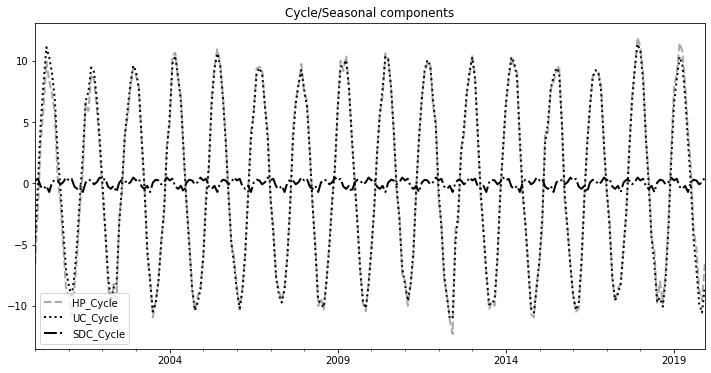

In [20]:
plt.title('Cycle/Seasonal components')
decomp['HP_Cycle'].plot(figsize=(12, 6), color='darkgray', linestyle='--', lw=2, legend='HP_Cycle')
decomp['UC_Cycle'].plot(figsize=(12, 6), color='black', linestyle=':', lw=2, legend='UC_Cycle')
decomp['SDC_Cycle'].plot(figsize=(12, 6), color='black', linestyle='-.', lw=2, legend='SDC_Cycle')

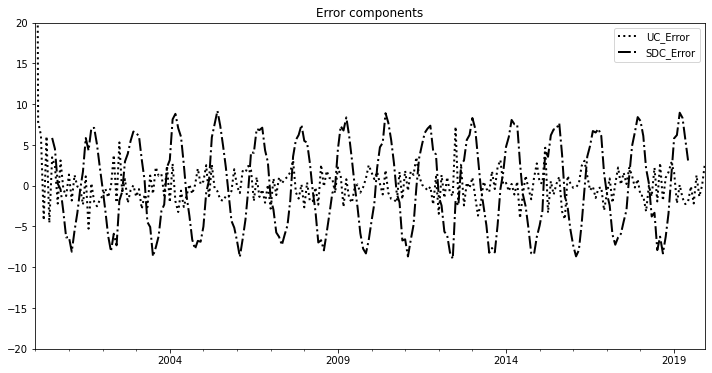

In [21]:
plt.title('Error components')
plt.ylim((-20, 20))
decomp['UC_Error'].plot(figsize=(12, 6), color='black', linestyle=':', lw=2, legend='UC_Error')
decomp['SDC_Error'].plot(figsize=(12, 6), color='black', linestyle='-.', lw=2, legend='SDC_Error')

In [22]:
# Stationarity

In [23]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dataset['Price'])
print('Test Stat: {}\np value: {}\nLags: {}\nNum observations: {}'.format(result[0], result[1], result[2], result[3]))

Test Stat: 0.47882793726850786
p value: 0.9842151821849324
Lags: 14
Num observations: 225


In [24]:
price_diff = (dataset['Price'].shift(-1) - dataset['Price']).fillna(0)
price_diff

2000-01-31    4.951062
2000-02-29    5.686832
2000-03-31    3.243634
2000-04-30    4.065744
2000-05-31   -1.253538
                ...   
2019-08-31   -1.101791
2019-09-30   -3.106142
2019-10-31   -0.474033
2019-11-30    3.350694
2019-12-31    0.000000
Name: Price, Length: 240, dtype: float64

In [25]:
result = adfuller(price_diff)
print('Test Stat: {}\np value: {}\nLags: {}\nNum observations: {}'.format(result[0], result[1], result[2], result[3]))

Test Stat: -7.295184662866956
p value: 1.3839111942229784e-10
Lags: 15
Num observations: 224


In [26]:
# ACF

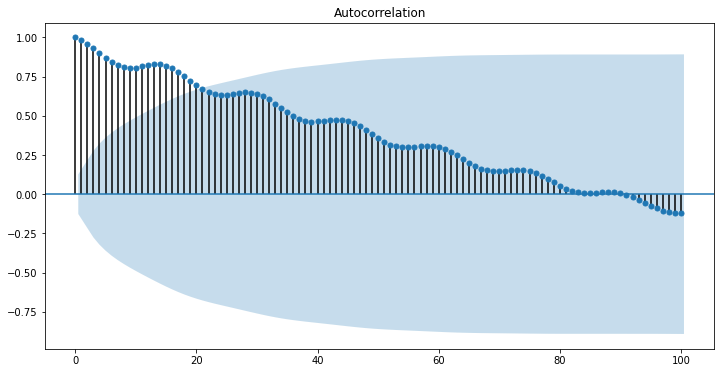

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plot_acf(dataset['Price'], lags=100)
fig.set_size_inches(12, 6)

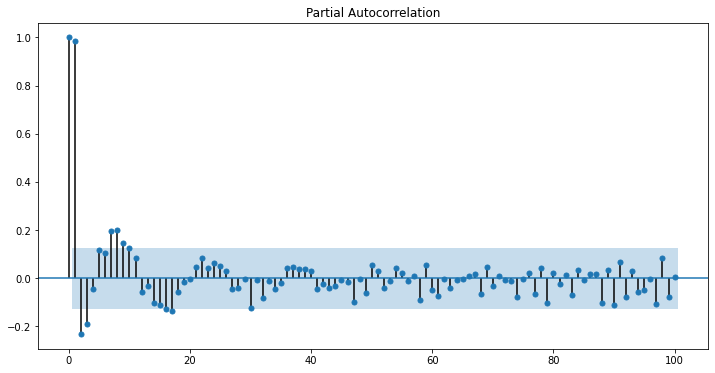

In [28]:
fig = plot_pacf(dataset['Price'], lags=100)
fig.set_size_inches(12, 6)

In [29]:
# ARIMA

In [30]:
from statsmodels.tsa.arima.model import ARIMA
arima = ARIMA(dataset['Price'], order=(36,1,2))
res_ar = arima.fit()
res_ar.summary()

/home/sghosh/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/home/sghosh/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/home/sghosh/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/home/sghosh/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/sghosh/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  240
Model:                ARIMA(36, 1, 2)   Log Likelihood                -360.195
Date:                Sat, 13 Jun 2020   AIC                            798.391
Time:                        09:18:46   BIC                            933.973
Sample:                    01-31-2000   HQIC                           853.027
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8184      0.821     -0.997      0.319      -2.428       0.791
ar.L2         -0.6716      0.495     -1.358      0.175      -1.641       0.298
ar.L3         -0.6027      0.323     -1.868      0.062      -1.235       0.030
ar.L4         -0.5080      0.299     -1.701      0.089      -1.093       0.077
ar.L5         -0.3090      0.276     -1.120      0.263      -0.850       0.232
ar.L6         -0.1506      0.179     -0.843      0.399      -0.501       0.200
ar.L7         -0.1234      0.132     -0.934      0.350      -0.382       0.135
ar.L8         -0.2092      0.130     -1.609      0.108      -0.464       0.046
ar.L9         -0.2480      0.178     -1.391      0.164      -0.597       0.102
ar.L10        -0.3138      0.181     -1.734      0.083      -0.669       0.041
ar.L11        -0.2192      0.208     -1.052      0.293      -0.628       0.189
ar.L12        -0.2630      0.157     -1.677      0.094      -0.570       0.044
ar.L13        -0.2165      0.180     -1.203      0.229      -0.569       0.136
ar.L14        -0.1002      0.164     -0.612      0.541      -0.421       0.221
ar.L15         0.0130      0.117      0.112      0.911      -0.216       0.242
ar.L16         0.1376      0.101      1.363      0.173      -0.060       0.335
ar.L17         0.1003      0.147      0.684      0.494      -0.187       0.387
ar.L18         0.1228      0.117      1.047      0.295      -0.107       0.353
ar.L19         0.1545      0.119      1.299      0.194      -0.079       0.388
ar.L20         0.1968      0.136      1.447      0.148      -0.070       0.463
ar.L21         0.1919      0.158      1.217      0.224      -0.117       0.501
ar.L22         0.1841      0.157      1.172      0.241      -0.124       0.492
ar.L23         0.0830      0.146      0.569      0.570      -0.203       0.369
ar.L24         0.0569      0.132      0.432      0.666      -0.201       0.315
ar.L25         0.1346      0.122      1.106      0.269      -0.104       0.373
ar.L26         0.2490      0.146      1.705      0.088      -0.037       0.535
ar.L27         0.3165      0.196      1.617      0.106      -0.067       0.700
ar.L28         0.4133      0.213      1.941      0.052      -0.004       0.831
ar.L29         0.5111      0.265      1.932      0.053      -0.007       1.030
ar.L30         0.5743      0.329      1.748      0.081      -0.070       1.218
ar.L31         0.5518      0.350      1.576      0.115      -0.135       1.238
ar.L32         0.4991      0.312      1.602      0.109      -0.112       1.110
ar.L33         0.3840      0.259      1.483      0.138      -0.123       0.891
ar.L34         0.3775      0.197      1.917      0.055      -0.008       0.763
ar.L35         0.3125      0.206      1.514      0.130      -0.092       0.717
ar.L36         0.1370      0.161      0.851      0.395      -0.178       0.452
ma.L1         -0.0244      0.819     -0.030      0.976      -1.630       1.581
ma.L2          0.1694      0.454      0.373      0.709      -0.721       1.060
si

In [31]:
dataset['PredPrice'] = res_ar.predict(dataset.index[0], dataset.index[-1])
dataset

,Price,PredPrice
2000-01-31,95.317833,0.000000
2000-02-29,100.268895,95.317901
2000-03-31,105.955727,101.106060
2000-04-30,109.199362,108.516068
2000-05-31,113.265105,111.751079
...,...,...
2019-08-31,193.205975,194.391888
2019-09-30,192.104184,191.481139
2019-10-31,188.998042,189.666493
2019-11-30,188.524009,188.944216


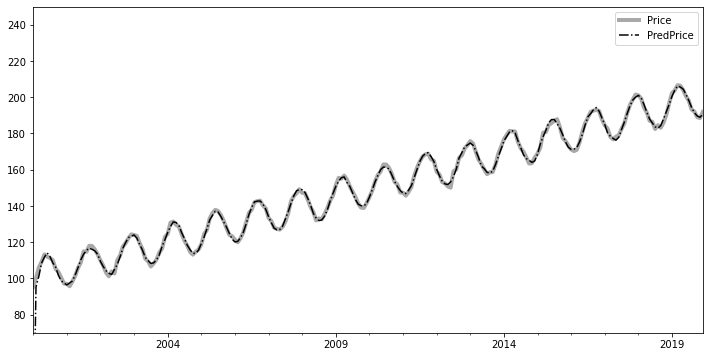

In [32]:
plt.ylim(70, 250)
dataset['Price'].plot(figsize=(12, 6), color='darkgray', linestyle='-', lw=4, legend='Price')
dataset['PredPrice'].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')

In [33]:
extended_dataset = pd.DataFrame(index=sm.tsa.datetools.dates_from_range('2020m1', length=48))
extended_dataset = dataset.append(extended_dataset)
extended_dataset

,Price,PredPrice
2000-01-31,95.317833,0.000000
2000-02-29,100.268895,95.317901
2000-03-31,105.955727,101.106060
2000-04-30,109.199362,108.516068
2000-05-31,113.265105,111.751079
...,...,...
2023-08-31,NaN,NaN
2023-09-30,NaN,NaN
2023-10-31,NaN,NaN
2023-11-30,NaN,NaN


In [34]:
extended_dataset['PredPrice'] = res_ar.predict(extended_dataset.index[0], extended_dataset.index[-1])
extended_dataset

,Price,PredPrice
2000-01-31,95.317833,0.000000
2000-02-29,100.268895,95.317901
2000-03-31,105.955727,101.106060
2000-04-30,109.199362,108.516068
2000-05-31,113.265105,111.751079
...,...,...
2023-08-31,NaN,206.488532
2023-09-30,NaN,208.030690
2023-10-31,NaN,211.103250
2023-11-30,NaN,215.441777


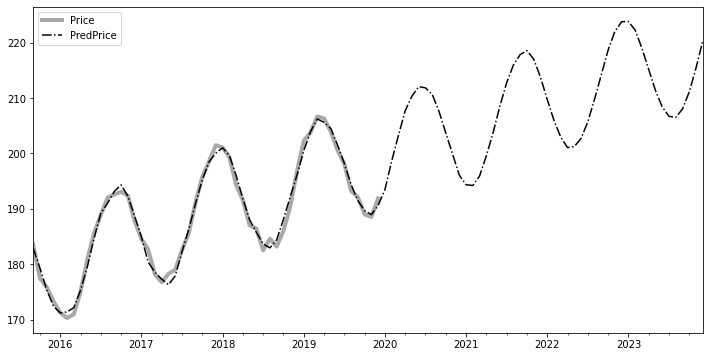

In [35]:
extended_dataset['Price'].iloc[-100:].plot(figsize=(12, 6), color='darkgray', linestyle='-', lw=4, legend='Price')
extended_dataset['PredPrice'].iloc[-100:].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')